# Buyer's Time Prediction Challenge (MachineHack)

#### Overview

Buyers spend a significant amount of time surfing an e-commerce store, since the pandemic the e-commerce has seen a boom in the number of users across the domains. In the meantime, the store owners are also planning to attract customers using various algorithms to leverage customer behavior patterns

Tracking customer activity is also a great way of understanding customer behavior and figuring out what can actually be done to serve them better. Machine learning and AI has already played a significant role in designing various recommendation engines to lure customers by predicting their buying patterns

In this competition provided the visitor's session data, we are challenging the Machinehack community to come up with a regression algorithm to predict the time a buyer will spend on the platform.

#### Attribute Description:

* session_id - Unique identifier for every row
* session_number - Session type identifier
* client_agent - Client-side software details
* device_details -  Client-side device details
* date - Datestamp of the session
* purchased - Binary value for any purchase done
* added_in_cart - Binary value for cart activity
* checked_out -  Binary value for checking out successfully
* time_spent - Total time spent in seconds (Target Column)

 
#### Skills:

* Regression Modeling
* Advance Feature engineering, with Datestamp and Text datatypes
* Optimizing RMSLE score as a metric to generalize well on unseen data

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

###### python libraries

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

###### visualization libraries

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

###### Machine Learning Libraries

In [3]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_log_error

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

###### Load the datasets

In [4]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [5]:
train.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-22,1,0,0,236.886
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,2019-08-01,0,0,0,21.704
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2019-12-30,0,1,0,455.201
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,2019-09-10,0,0,0,1164.877


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5429 entries, 0 to 5428
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   session_id      5429 non-null   object 
 1   session_number  5429 non-null   int64  
 2   client_agent    5269 non-null   object 
 3   device_details  5429 non-null   object 
 4   date            5429 non-null   object 
 5   purchased       5429 non-null   int64  
 6   added_in_cart   5429 non-null   int64  
 7   checked_out     5429 non-null   int64  
 8   time_spent      5429 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 381.9+ KB


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5429 entries, 0 to 5428
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   session_id      5429 non-null   object 
 1   session_number  5429 non-null   int64  
 2   client_agent    5269 non-null   object 
 3   device_details  5429 non-null   object 
 4   date            5429 non-null   object 
 5   purchased       5429 non-null   int64  
 6   added_in_cart   5429 non-null   int64  
 7   checked_out     5429 non-null   int64  
 8   time_spent      5429 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 381.9+ KB


### EDA Steps

1. **Univariate Analysis:** Look into columns individually and plot them and see the pattern
2. **Bivariate Analysis:** Analysis of predictor versus target variable
 
    - Num vs Num: Scatter plot.
    - Num vs Cat: Boxplot/Violinplot.
    - Cat vs Cat: pd.crosstab and then see if you can apply sns.countplot.
    -  Two faces plot basis category. Facetgrid plot.

3. **Missing Values:** Columns you have missing values. (Remove only if more than 90% data is missing and you cannot fill it then remove)
4. **Outlier Analysis:** Boxplot or Normal Distribution. Boxplots (Q1-1.5IQR | Q3+1.5IQR) or (3SD<Normal Dist)
5. **Feature Engineering:** Process of generalizing info. in data. Helps in improving overall performance of ML.
6. **Scaling and Transformation**: **(Never scale dummy variables)**
7.

In [8]:
train.date = train.date.astype('datetime64')
# train.session_number = train.session_number.astype('category')
# train.device_details = train.device_details.astype('category')

train.drop('session_id',axis = 1,inplace = True)

test.date = train.date.astype('datetime64')
test.session_number = train.session_number.astype('category')
test.device_details = train.device_details.astype('category')

test.drop('session_id',axis = 1,inplace = True)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5429 entries, 0 to 5428
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   session_number  5429 non-null   int64         
 1   client_agent    5269 non-null   object        
 2   device_details  5429 non-null   object        
 3   date            5429 non-null   datetime64[ns]
 4   purchased       5429 non-null   int64         
 5   added_in_cart   5429 non-null   int64         
 6   checked_out     5429 non-null   int64         
 7   time_spent      5429 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 339.4+ KB


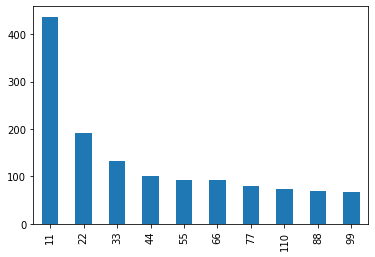

In [10]:
#Univariate Analysis
train['session_number'].value_counts(ascending = False)[:10].plot(kind = 'bar')
plt.show()

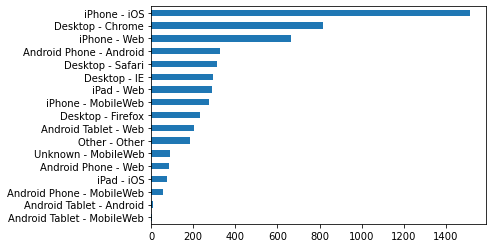

In [11]:
train['device_details'].value_counts(ascending = True).plot(kind = 'barh')
plt.show()

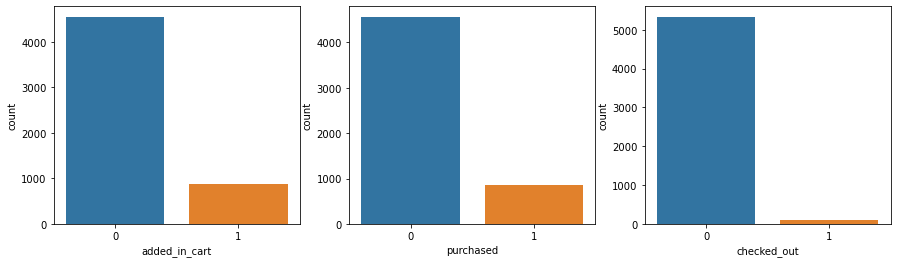

In [12]:
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,4))
sns.countplot('checked_out',data = train,ax = ax[2])
sns.countplot('added_in_cart',data = train,ax = ax[0])
sns.countplot('purchased',data = train,ax = ax[1])
plt.show()

In [13]:
train['day'] = [i.day for i in train['date']]
train['month'] = [i.month for i in train['date']]
train['year'] = [i.year for i in train['date']]

test['day'] = [i.day for i in test['date']]
test['month'] = [i.month for i in test['date']]
test['year'] = [i.year for i in test['date']]

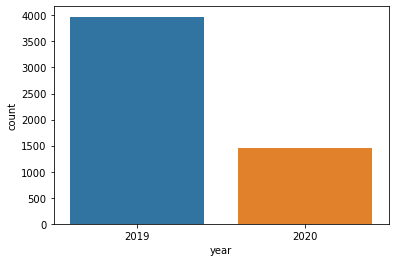

In [14]:
sns.countplot(train['year'])
plt.show()

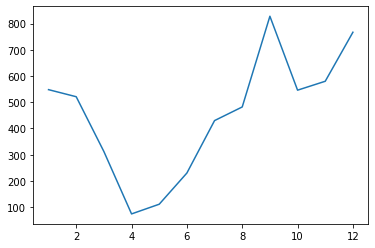

In [15]:
trending = train['month'].value_counts(ascending = False)
sns.lineplot(trending.index,trending.values)
plt.show()

In [16]:
train.drop('date',axis = 1,inplace = True)
test.drop('date',axis = 1,inplace = True)

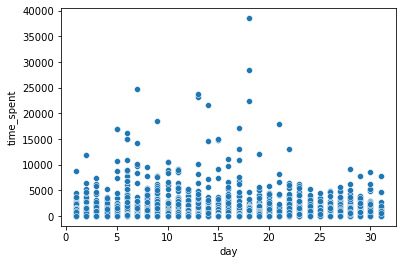

In [17]:
#Bivariate Analysis
#num vs num
sns.scatterplot('day','time_spent',data = train)
plt.show()

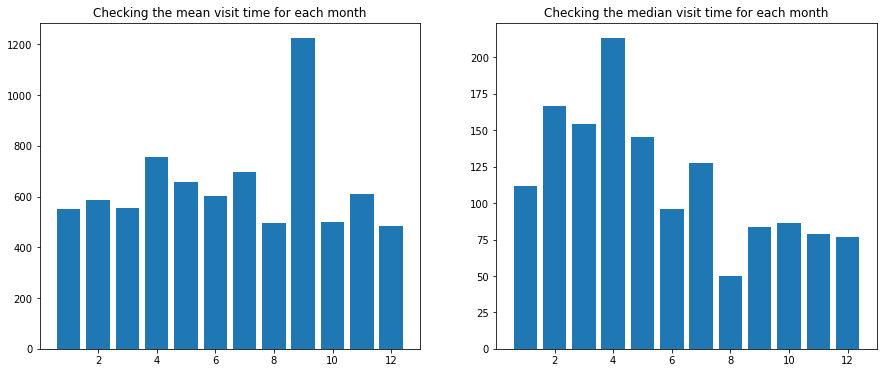

In [18]:
fig,ax = plt.subplots(1,2,figsize = (15,6))
ax[0].bar(train.groupby('month').mean()['time_spent'].index,train.groupby('month').mean()['time_spent'].values)
ax[0].set_title('Checking the mean visit time for each month')
ax[1].bar(train.groupby('month').median()['time_spent'].index,train.groupby('month').median()['time_spent'].values)
ax[1].set_title('Checking the median visit time for each month')
# fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,6))

# ax[0].bar(train['day'].value_counts().index,train['day'].value_counts().values)

plt.show()

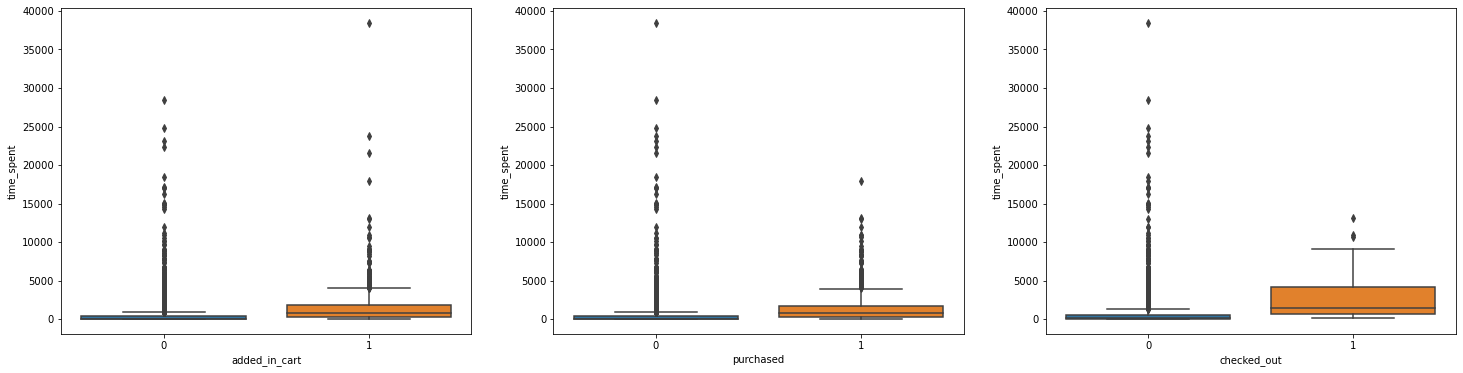

In [19]:
#num vs cat
fig,ax = plt.subplots(1,3,figsize = (25,6))
sns.boxplot('added_in_cart','time_spent',data = train,ax = ax[0])
sns.boxplot('purchased','time_spent',data = train,ax = ax[1])
sns.boxplot('checked_out','time_spent',data = train,ax = ax[2])
plt.show()

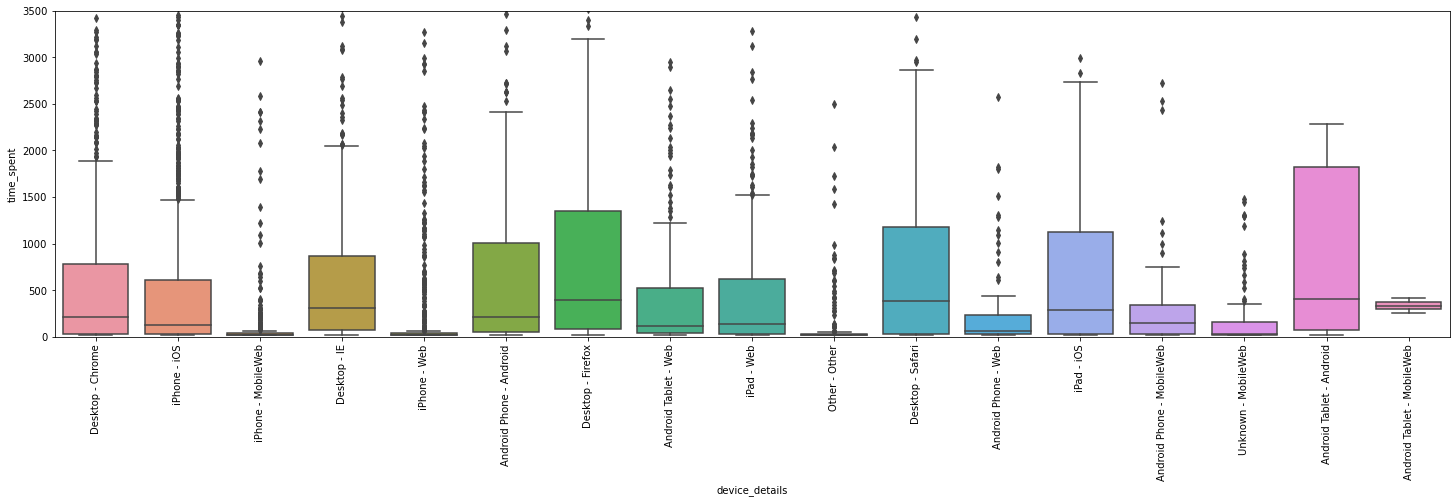

In [20]:
plt.figure(figsize = (25,6))
sns.boxplot('device_details','time_spent',data = train)
plt.xticks(rotation = 90)
plt.ylim(-2,3500)
plt.show()

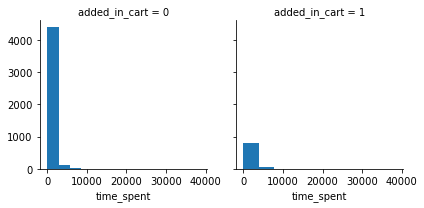

In [21]:
g = sns.FacetGrid(data = train,col = 'added_in_cart')
g.map(plt.hist,'time_spent')
plt.show()

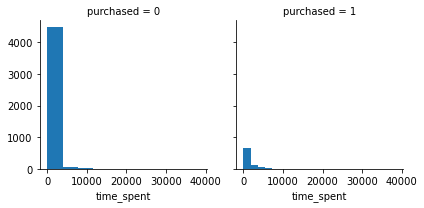

In [22]:
g = sns.FacetGrid(data = train,col = 'purchased')
g.map(plt.hist,'time_spent')
plt.show()

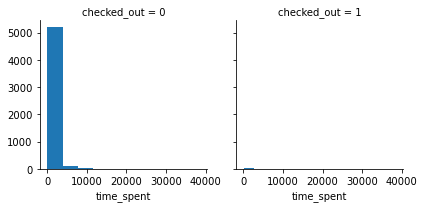

In [23]:
g = sns.FacetGrid(data = train,col = 'checked_out')
g.map(plt.hist,'time_spent')
plt.show()

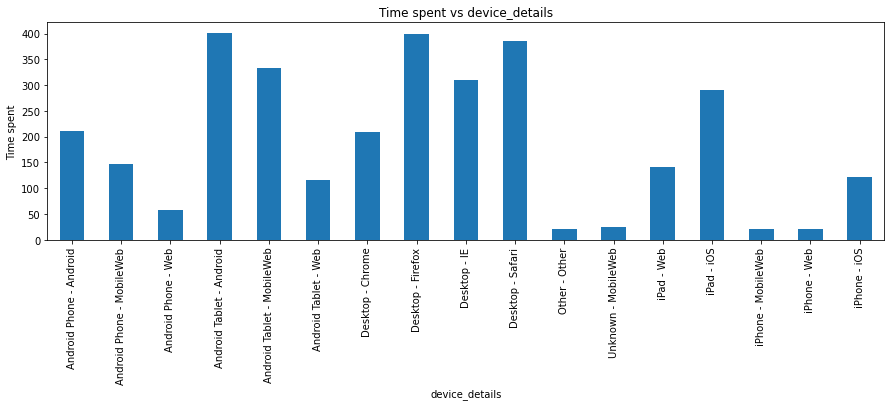

In [24]:
plt.figure(figsize = (15,4))
train.groupby('device_details')['time_spent'].median().plot(kind = 'bar')
plt.ylabel('Time spent')
plt.title('Time spent vs device_details')
plt.show()

In [25]:
train['device'] = [i.partition('-')[0].strip() for i in train['device_details']]
train['platform'] =  [i.partition('-')[2].strip() for i in train['device_details']]

test['device'] = [i.partition('-')[0].strip() for i in test['device_details']]
test['platform'] =  [i.partition('-')[2].strip() for i in test['device_details']]

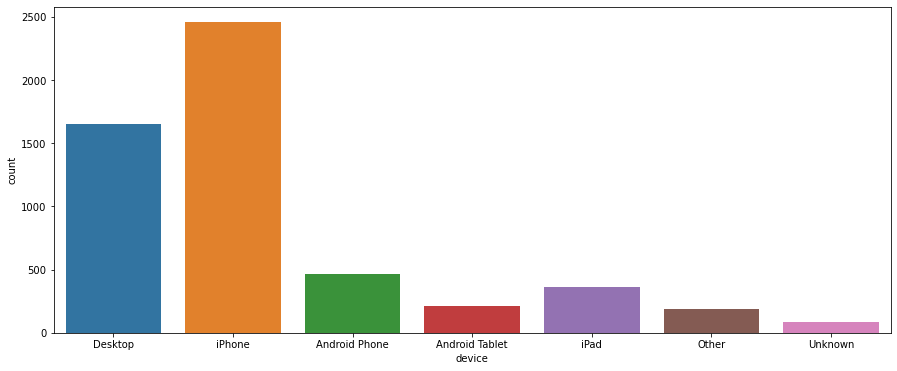

In [26]:
plt.figure(figsize = (15,6))
sns.countplot(train['device'])
plt.show()

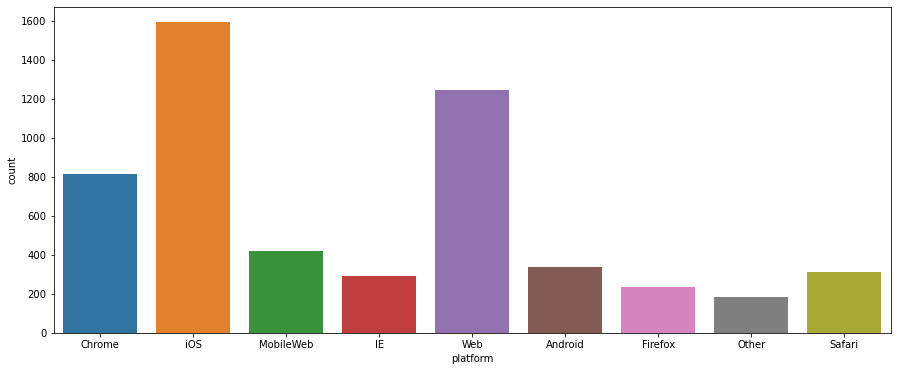

In [27]:
plt.figure(figsize = (15,6))
sns.countplot(train['platform'])
plt.show()

# Analyze above Variables

In [28]:
#cat vs cat

In [29]:
d1 = pd.crosstab(train['purchased'],train['month'])
d2 = pd.crosstab(train['added_in_cart'],train['month'])
d3 = pd.crosstab(train['checked_out'],train['month'])

In [30]:
dd1 = pd.crosstab(train['purchased'],train['device_details'])
dd2 = pd.crosstab(train['added_in_cart'],train['device_details'])
dd3 = pd.crosstab(train['checked_out'],train['device_details'])

$H_O$: Month has no effect on purchased

$H_A$: Month has an effect on purchase

In [31]:
teststats, pvalue, df,exp_freq = stats.chi2_contingency(d1)
print(pvalue<0.05)
teststats, pvalue, df,exp_freq = stats.chi2_contingency(d2)
print(pvalue<0.05)
teststats, pvalue, df,exp_freq = stats.chi2_contingency(d3)
print(pvalue<0.05)

True
True
False


In [32]:
teststats, pvalue, df,exp_freq = stats.chi2_contingency(dd1)
print(pvalue<0.05)
teststats, pvalue, df,exp_freq = stats.chi2_contingency(dd2)
print(pvalue<0.05)
teststats, pvalue, df,exp_freq = stats.chi2_contingency(dd3)
print(pvalue<0.05)

True
True
True


###### Univariate Analysis

* Session Number 11 seems to be a very loyal customer. They have far exceeded the rest in terms of number of sessions created. We will have to check if this has any effect on total time spent.
* Most traffic seems to be coming from iPhone users.
* Seems to me that people who add stuff to their cart are mostly trying to purchase the product but are having problems at checkout.
* There are lesser records for the year 2020 hence the disparity in the records in terms of year. The dataset seems to be of exactly one year from May 2019 to April 2020.
* The website sees least amount of traffic in April and their best months are during Diwali and christmas season. This follows the modelling trend and seasonality principle of marketing.

###### Bivariate Analysis

* Day and time spent has no relation with each other.
* There are lesser number of visitors in April but the duration of each session is much higher in this month than the rest of the dataset. Since we are trying to predict the time spent, this could be significant.
* There are many outliers when we compare the added_in_cart,purchased and check_out features with the time spent feature.
* When comparing the time spent, we see an overeall positive skew will all features. This is expected since not all people will spend the same amount of time on the website. We will not manipulate the time spent column since it is our dependent variable.
* Time spent is inversely proportional with added_in_cart,purchased and check out. The more a person spends time on the site, the lesser he is likely to purchase a product.
* On performing chi square test between month and 3 columns purchased,added_to_cart,checked_out, we see that check outs are the only column that do not depend on the month. Probably due to a lesser number of check outs. Other two columns directly depend upon the month rejecting the null hypothesis.
* They type of device a person has a direct impact on whether a user adds something to cart or purchases or checks out.

# Feature Engineering

In [33]:
train.drop(['client_agent','device_details'],axis = 1,inplace = True)
test.drop(['client_agent','device_details'],axis = 1,inplace = True)

In [34]:
def month_cat(x):
    if x<=3:
        return "Q1"
    elif x>3 and x<=6:
        return "Q2"
    elif x>6 and x<=9:
        return "Q3"
    else:
        return "Q4"

In [35]:
train['quarter'] = train['month'].apply(month_cat)
test['quarter'] = test['month'].apply(month_cat)


In [36]:
train['monthhalf'] = ["1st half of month" if i>15 else "2nd half of month" for i in train['day']]
test['monthhalf'] = ["1st half of month" if i>15 else "2nd half of month" for i in test['day']]

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5429 entries, 0 to 5428
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   session_number  5429 non-null   int64  
 1   purchased       5429 non-null   int64  
 2   added_in_cart   5429 non-null   int64  
 3   checked_out     5429 non-null   int64  
 4   time_spent      5429 non-null   float64
 5   day             5429 non-null   int64  
 6   month           5429 non-null   int64  
 7   year            5429 non-null   int64  
 8   device          5429 non-null   object 
 9   platform        5429 non-null   object 
 10  quarter         5429 non-null   object 
 11  monthhalf       5429 non-null   object 
dtypes: float64(1), int64(7), object(4)
memory usage: 509.1+ KB


In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   session_number  2327 non-null   category
 1   purchased       2327 non-null   int64   
 2   added_in_cart   2327 non-null   int64   
 3   checked_out     2327 non-null   int64   
 4   day             2327 non-null   int64   
 5   month           2327 non-null   int64   
 6   year            2327 non-null   int64   
 7   device          2327 non-null   object  
 8   platform        2327 non-null   object  
 9   quarter         2327 non-null   object  
 10  monthhalf       2327 non-null   object  
dtypes: category(1), int64(6), object(4)
memory usage: 211.2+ KB


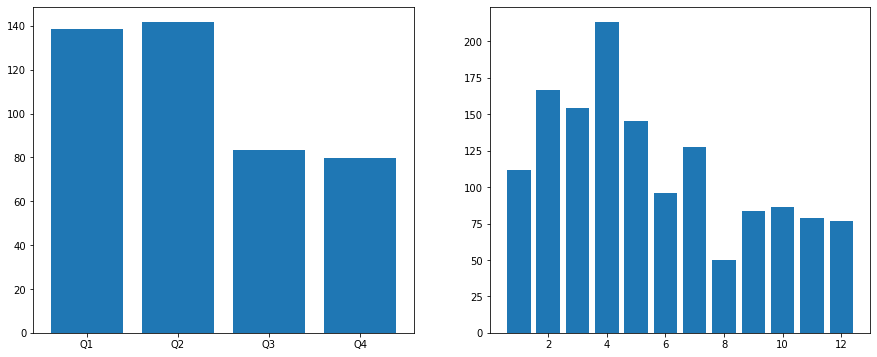

In [39]:
fig,ax  = plt.subplots(1,2,figsize = (15,6))

ax[0].bar(train.groupby('quarter')['time_spent'].median().index,train.groupby('quarter')['time_spent'].median().values)
ax[1].bar(train.groupby('month')['time_spent'].median().index,train.groupby('month')['time_spent'].median().values)
plt.show()

In [40]:
test.columns

Index(['session_number', 'purchased', 'added_in_cart', 'checked_out', 'day',
       'month', 'year', 'device', 'platform', 'quarter', 'monthhalf'],
      dtype='object')

In [41]:
train.columns

Index(['session_number', 'purchased', 'added_in_cart', 'checked_out',
       'time_spent', 'day', 'month', 'year', 'device', 'platform', 'quarter',
       'monthhalf'],
      dtype='object')

In [42]:
train['monthhalf'] = train['monthhalf'].replace({'1st half of month':0,'2nd half of month':1})
test['monthhalf'] = test['monthhalf'].replace({'1st half of month':0,'2nd half of month':1})

In [43]:
# train['quarter'] = train['quarter'].replace({"Q1":0,"Q2":1,"Q3":2,"Q4":4})
# test['quarter'] = test['quarter'].replace({"Q1":0,"Q2":1,"Q3":2,"Q4":4})

In [44]:
train.drop(['year','day','month'],axis = 1,inplace = True)
test.drop(['year','day','month'],axis = 1,inplace = True)


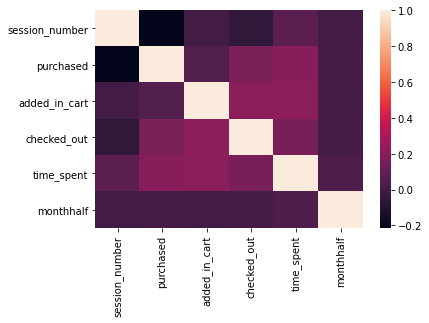

In [45]:
sns.heatmap(train.corr())

In [46]:
train.replace(train['device'].unique(),range(len(train['device'].unique())),inplace = True)
train.replace(train['platform'].unique(),range(len(train['platform'].unique())),inplace = True)
train.replace(train['quarter'].unique(),range(len(train['quarter'].unique())),inplace = True)

In [47]:
test.replace(test['device'].unique(),range(len(test['device'].unique())),inplace = True)
test.replace(test['platform'].unique(),range(len(test['platform'].unique())),inplace = True)
test.replace(test['quarter'].unique(),range(len(test['quarter'].unique())),inplace = True)

# Lets try an ML model on the current data

In [48]:
ss = StandardScaler()
X = train.drop('time_spent',axis = 1)
y = train.time_spent
X_Scaled = ss.fit_transform(X)

In [49]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 6)

In [50]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4343, 8), (1086, 8), (4343,), (1086,))

In [51]:
lr = LinearRegression()

In [52]:
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.17730684408780062

In [53]:
y_pred = abs(lr.predict(x_test))

In [54]:
score = np.sqrt(mean_squared_log_error(y_test, y_pred))
score

2.0462836747804434

# Try with ridge

In [55]:
r = Ridge()
r.fit(x_train,y_train)
r.score(x_test,y_test)

0.1771002037075411

# Try with Lasso

In [56]:
l = Lasso()
l.fit(x_train,y_train)
l.score(x_test,y_test)

0.1763670575373142

In [61]:
test_Scaled = ss.fit_transform(test)
test_pred = abs(lr.predict(test_Scaled))

In [62]:
df = pd.DataFrame(test_pred,columns = ['time_spent'])
df.to_csv("Submissions/linearregression.csv",index = False)

In [63]:
test_pred

array([1390.7004144 ,  909.09152883, 1625.81491569, ...,  661.31662458,
       1391.97794681, 1158.31937654])

# Let us try a more advance algorithm like Decision Tree